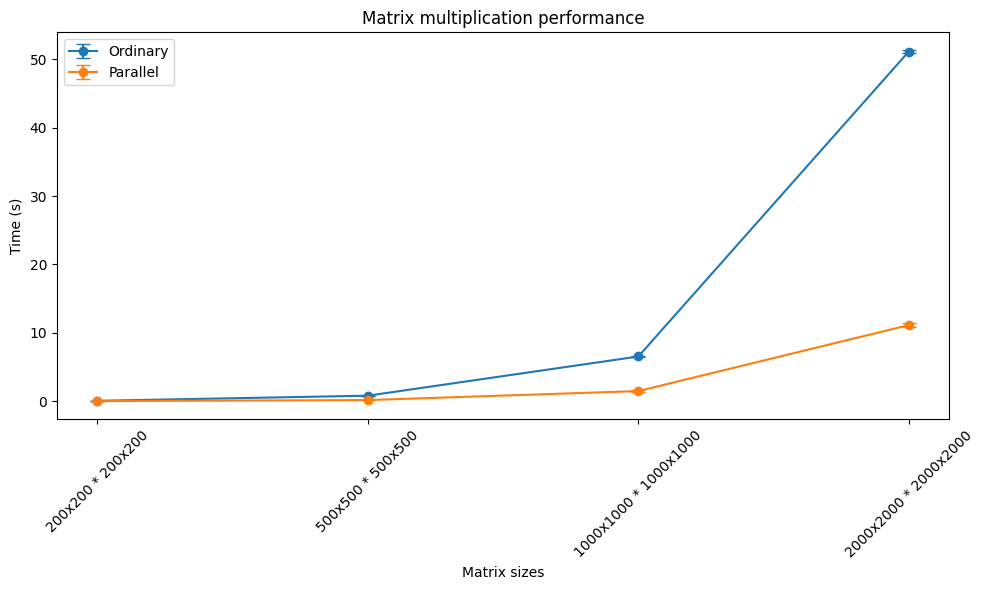

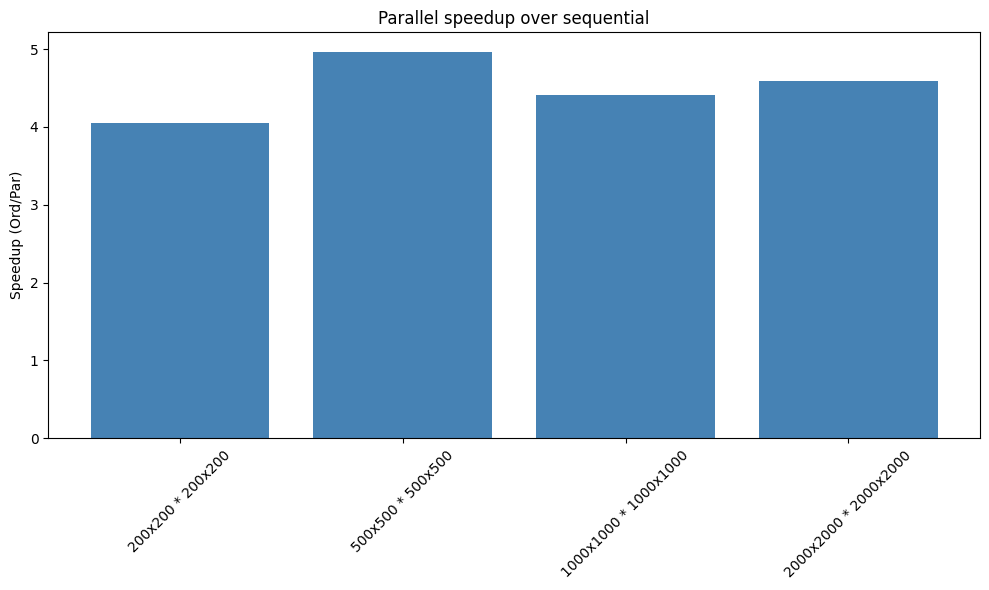

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results_blocks.csv")

df['Size'] = df.apply(lambda r: f"{r['RowsLeft']}x{r['ColsLeft']} * {r['RowsRight']}x{r['ColsRight']}", axis=1)

plt.figure(figsize=(10, 6))
for mode in ["Ordinary", "Parallel"]:
    subset = df[df["Mode"] == mode]
    plt.errorbar(subset["Size"], subset["Mean"], yerr=subset["StdDev"],
                 marker='o', capsize=5, label=mode)

plt.xticks(rotation=45)
plt.xlabel("Matrix sizes")
plt.ylabel("Time (s)")
plt.title("Matrix multiplication performance")
plt.legend()
plt.tight_layout()
plt.savefig("times_blocks.png", dpi=200)
plt.show()

# строим график ускорения
plt.figure(figsize=(10, 6))
speedups = []
sizes = []
for size in df['Size'].unique():
    seq = df[(df['Size'] == size) & (df['Mode'] == "Ordinary")]["Mean"].values[0]
    par = df[(df['Size'] == size) & (df['Mode'] == "Parallel")]["Mean"].values[0]
    speedups.append(seq / par)
    sizes.append(size)

plt.bar(sizes, speedups, color="steelblue")
plt.xticks(rotation=45)
plt.ylabel("Speedup (Ord/Par)")
plt.title("Parallel speedup over sequential")
plt.tight_layout()
plt.savefig("speedup_blocks.png", dpi=200)
plt.show()
